# Machine Learning using Support Vector Machine with Gaussian Radial Basis Function-  Himanshu Bhardwaj

Photo electric formation factor is very effective in identifying the lithologies. Lithologies has a range of values of PEF. Classification based on PEF can be done just adding one featue more, making dataset 2D and the features becomes linearly separable. Adding features can be done using Gaussian Radial basis function which is a bell shaped function. given by below equation.

$$\phi\gamma(x,l) = exp(-\gamma||x-l||^2)$$

This function adds many dimension in the dataset, transforming the training dataset linearly separable. The geophysical logs classified by this method and the results are shown below.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = pd.read_csv('DataSet.csv')
X.head()

,GR,NPHI,DPHI,PEF,PICK,TRUE
0,18.4445,0.1263,0.0973,2.5341,7,7
1,18.4814,0.1138,0.0882,2.5683,7,7
2,17.9632,0.1100,0.0890,2.5396,7,7
3,16.0150,0.1213,0.1170,2.3682,7,7
4,14.6361,0.1112,0.1520,2.1106,10,10


In [3]:
Lith = pd.read_csv('Lithology.csv')
Lith.columns = ['TRUE', 'Lithology']
Lith

,TRUE,Lithology
0,2,Halite
1,3,Gypsum
2,4,Dolomite
3,5,Dolomitic Limestone
4,6,Cherty Dolomitic Limestone
5,7,Cherty Dolomite
6,8,Limestone
7,9,Cherty Limestone
8,10,Chert
9,11,Shale


In [6]:
X = X.merge(Lith, on='TRUE')
X

,GR,NPHI,DPHI,PEF,PICK,TRUE,Lithology
0,18.4445,0.1263,0.0973,2.5341,7,7,Cherty Dolomite
1,18.4814,0.1138,0.0882,2.5683,7,7,Cherty Dolomite
2,17.9632,0.1100,0.0890,2.5396,7,7,Cherty Dolomite
3,16.0150,0.1213,0.1170,2.3682,7,7,Cherty Dolomite
4,17.4286,0.0877,0.0846,2.3734,7,7,Cherty Dolomite
...,...,...,...,...,...,...,...
4583,76.6608,0.2786,-0.1766,7.2234,13,13,Ironstone
4584,74.0910,0.2434,-0.3404,9.8867,13,13,Ironstone
4585,74.3129,0.2507,-0.3196,9.5217,13,13,Ironstone
4586,75.2727,0.2559,-0.2908,9.0778,13,13,Ironstone


In [7]:
from sklearn.model_selection import StratifiedShuffleSplit

In [8]:
pp = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=52)

In [9]:
X_train = []
X_test = []
for train_index, test_index in pp.split(X, X['TRUE']):
    X_train.append(X.loc[train_index])
    X_test.append(X.loc[test_index])

In [11]:
train = X_train[-1]
test = X_test[-1]

In [14]:
train_X = train[['GR', 'PEF']]
train_Y = train['TRUE']
test_X = test[['GR', 'PEF']]
test_Y  = test['TRUE']

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [26]:
rbf_kernel_SVC = Pipeline((
    ("scaler", StandardScaler()),
                         ("svm_clf", SVC(kernel="rbf", gamma=5, C=1000))))

In [27]:
rbf_kernel_SVC.fit(train_X, train_Y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=1000, break_ties=False, cache_size=200,
                     class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=5,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [28]:
pred_test = rbf_kernel_SVC.predict(test_X)

In [29]:
pred_test

array([ 5,  5, 11, ...,  6, 11, 12], dtype=int64)

**Confusion Matrix showing classification error**

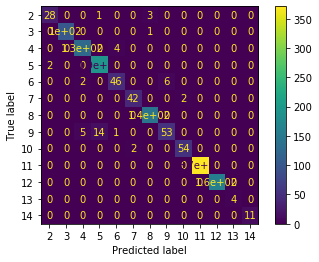

In [30]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rbf_kernel_SVC, test_X, test['TRUE'])

**Accuracy of the result**

In [31]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test['TRUE'], pred_test))

0.9687726942628904


**Final result**

![result_classification](result_classification.png)

![index of lithology](index_lithology.png)